In [1]:
import pickle

#opening the pickle file
file_name = "pickle_files/cleaned_sp500_df.pkl"
with open(file_name, 'rb') as file:
    cleaned_sp500_df = pickle.load(file)


In [2]:
cleaned_sp500_df.head()


Ticker,TSLA,MLM,POOL,PAYX,JCI,GPC,CAH,AJG,DLTR,HOLX,...,RCL,PRU,GRMN,HAS,ESS,NUE,JBHT,AMAT,ACGL,PYPL
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14 00:00:00+00:00,15.137333,98.845337,47.631180,31.855057,29.054077,65.548637,56.079235,36.220329,55.880001,23.920000,...,50.171078,52.597412,37.061481,39.956547,137.822662,38.207870,66.783379,16.996983,18.316668,NaN
2014-10-15 00:00:00+00:00,15.313333,100.631470,47.970528,31.496561,28.512375,65.820229,55.064140,36.089497,55.240002,23.360001,...,48.691025,51.030968,37.849709,39.592178,138.176483,38.254654,66.946983,17.076080,17.916668,NaN
2014-10-16 00:00:00+00:00,15.090000,104.286591,51.328083,31.525818,28.497742,66.423729,54.236980,35.885101,55.049999,23.150000,...,49.949516,51.660164,38.397095,39.504738,138.235413,38.628853,67.919609,17.462774,17.766666,NaN
2014-10-17 00:00:00+00:00,15.165333,108.374489,50.801243,31.825790,29.420084,66.800919,55.357380,36.481945,56.580002,23.860001,...,51.145958,53.128288,38.127060,39.242382,137.630951,38.909504,68.092300,17.471556,18.123333,NaN
2014-10-20 00:00:00+00:00,15.364667,110.114586,51.337040,32.008709,29.398130,67.472343,55.725842,36.694550,57.340000,24.010000,...,54.265591,53.088989,38.550365,41.180832,139.798157,39.353878,68.046844,17.638535,18.240000,NaN


In [3]:
#n_series contains the number of time series 
n_series=cleaned_sp500_df.shape[1]
n_series

469

In [4]:
import numpy as np
# Initializing distance matrix
euclidean_distance = np.zeros((n_series, n_series))
dtw0_distance = np.zeros((n_series, n_series))
dtw60_distance = np.zeros((n_series, n_series))

In [5]:
from dtwclustering import DTWClustering


In [6]:
cleaned_sp500_df.iloc[:,1].values



array([ 98.84533691, 100.63146973, 104.28659058, ..., 531.15997314,
       534.52001953, 544.90002441])

In [7]:
# Initializing distance matrix
euclidean_distance = np.zeros((n_series, n_series))
dtw0_distance = np.zeros((n_series, n_series))
dtw60_distance = np.zeros((n_series, n_series))

In [ ]:


#two for cycle in order to obtain a distance matrix
for i in range(n_series):
    for j in range(i, n_series):
        seq1=cleaned_sp500_df.iloc[:,i].values
        seq2=cleaned_sp500_df.iloc[:,j].values
        seq1 = seq1.astype(float)
        seq2 = seq2.astype(float)
        seq1 = np.nan_to_num(seq1)  # Sostituisce NaN con 0 e inf con valori finiti
        seq2 = np.nan_to_num(seq2)
        distance= DTWClustering(seq1,seq2)
        euclidean_distance[i,j]= distance.euclidean_distance()
        dtw0_distance[i,j]= distance.dtw_no_window()
        dtw60_distance[i,j]= distance.dtw_with_window()
        # copy to value because the matrix is symmetric
        euclidean_distance[j, i] = euclidean_distance[i, j]
        dtw0_distance[j, i] = dtw0_distance[i, j]
        dtw60_distance[j, i] = dtw60_distance[i, j]

In [ ]:


# pickling of the three distance matrix 
with open('euclidean.pkl', 'wb') as file:
    pickle.dump((euclidean_distance), file)
with open('dtw0.pkl', 'wb') as file:
    pickle.dump((dtw0_distance), file)
with open('dtw60.pkl', 'wb') as file:
    pickle.dump((dtw60_distance), file)




In [ ]:
"""
code hierarchical clustering to group the time-series having a similar shape 
into several numbers of clusters (k = 3, 5, 7, and 11) 
+ silhouette index to determine quality.
"""

Hierarchical clustering using bottom-up strategy

In [19]:
#extract pickle distance matrix
import pickle
with open('dtw0.pkl', 'rb') as file:
    dtw0 = pickle.load(file)
with open('dtw60.pkl', 'rb') as file:
    dtw60 = pickle.load(file)
with open('euclidean.pkl', 'rb') as file:
    euclidean = pickle.load(file)


In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import  pyplot as plt
from scipy.spatial.distance import squareform

#convert the three distance matrix into a compact vector 1-D, beacuse scipy requires a 1-D imput

dist_euclidean_condensed = squareform(euclidean)
dist_dtw0_condensed = squareform(dtw0)
dist_dtw60_condensed = squareform(dtw60)

In [21]:
#implement HC using linkage average
linkage_euclidean = linkage(dist_euclidean_condensed, method='average')  
linkage_dtw0 = linkage(dist_dtw0_condensed, method='average')
linkage_dtw60 = linkage(dist_dtw60_condensed, method='average')


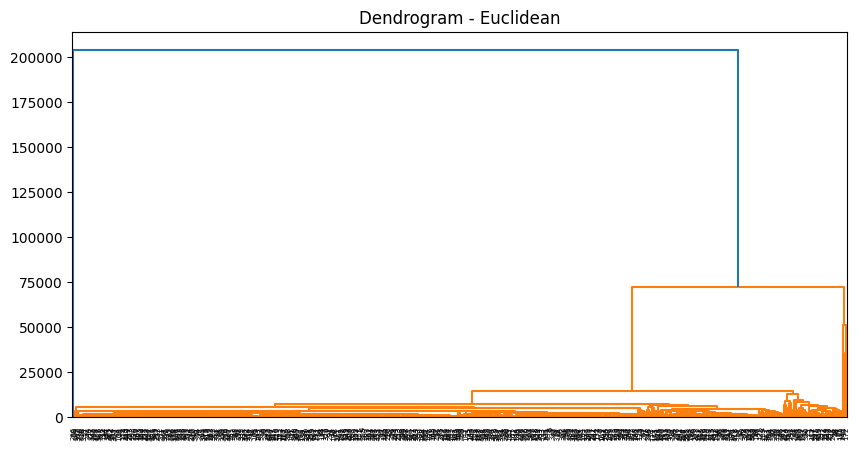

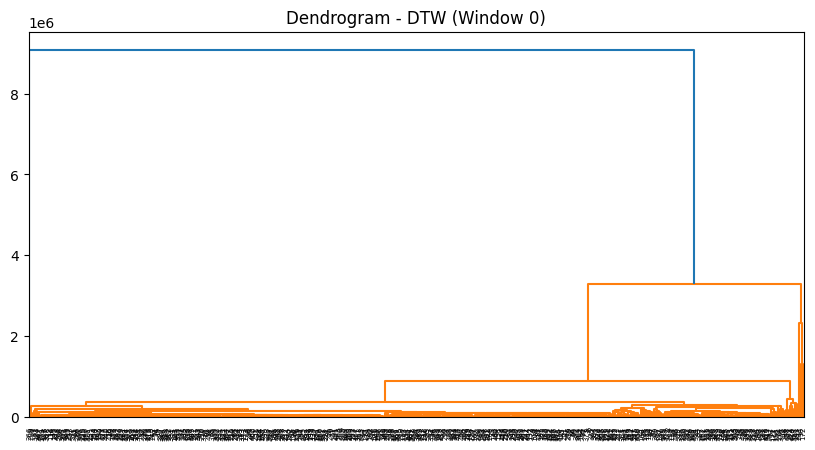

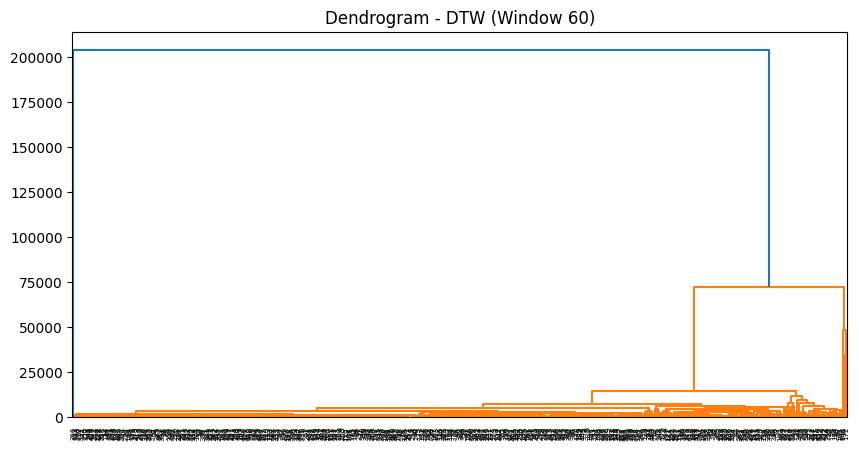

In [22]:
#visualizing dendrogram
plt.figure(figsize=(10, 5))
plt.title("Dendrogram - Euclidean")
dendrogram(linkage_euclidean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Dendrogram - DTW (Window 0)")
dendrogram(linkage_dtw0)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Dendrogram - DTW (Window 60)")
dendrogram(linkage_dtw60)
plt.show()


Euclidean distance

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#euclidean
for k in [3, 5, 7, 11]:
    clusters = fcluster(linkage_euclidean, k, criterion='maxclust')
    silhouette_avg=silhouette_score(euclidean, clusters, metric='euclidean')
    print(f"Indice di Silhouette per k={k}: {silhouette_avg}")

Indice di Silhouette per k=3: 0.9353751627877249
Indice di Silhouette per k=5: 0.8824662193488552
Indice di Silhouette per k=7: 0.6736077760618244
Indice di Silhouette per k=11: 0.5479575516482977


DTW 0 distance


In [47]:
for k in [3, 5, 7, 11]:
    clusters = fcluster(linkage_dtw0, k, criterion='maxclust')
    silhouette_avg=silhouette_score(dtw0, clusters, metric='euclidean')
    print(f"Indice di Silhouette per k={k}: {silhouette_avg}")


Indice di Silhouette per k=3: 0.9367471704022147
Indice di Silhouette per k=5: 0.8843120176413098
Indice di Silhouette per k=7: 0.6560542680859189
Indice di Silhouette per k=11: 0.5768037100795056


DTW 60 distance

In [48]:
for k in [3, 5, 7, 11]:
    clusters = fcluster(linkage_dtw60, k, criterion='maxclust')
    silhouette_avg=silhouette_score(dtw60, clusters, metric='euclidean')
    print(f"Indice di Silhouette per k={k}: {silhouette_avg}")

Indice di Silhouette per k=3: 0.9346773506814597
Indice di Silhouette per k=5: 0.8811612057952082
Indice di Silhouette per k=7: 0.6679997307287385
Indice di Silhouette per k=11: 0.5413283012388909
